In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as ndates

from pandas_datareader import data as web 
import warnings
warnings.filterwarnings('ignore')

import html5lib


import cufflinks as cf
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()



from ta.trend import MACD
from ta.momentum import StochasticOscillator

import yfinance as yf

In [3]:
avt = yf.download(tickers = 'AVT', period = '2y', interval = '1d')
avt

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-11,27.350000,27.459999,26.440001,26.490000,25.224964,1734400
2020-06-12,27.650000,27.990000,26.590000,27.330000,26.024853,804300
2020-06-15,26.290001,27.600000,26.180000,27.350000,26.043900,1314500
2020-06-16,28.320000,28.670000,27.400000,27.920000,26.586678,771800
2020-06-17,27.930000,27.940001,26.910000,27.260000,25.958197,717600
...,...,...,...,...,...,...
2022-06-06,48.689999,50.189999,48.439999,48.959999,48.699997,841000
2022-06-07,48.590000,49.669998,48.400002,49.070000,49.070000,826400
2022-06-08,49.150002,49.369999,48.279999,48.400002,48.400002,547900


In [4]:
# Making columns for 20 and 50 day exponential moving averages 
avt['MA20'] = avt['Adj Close'].ewm(span=20, adjust=False).mean()
avt['MA50'] = avt['Adj Close'].ewm(span=50, adjust=False).mean()
avt

,Open,High,Low,Close,Adj Close,Volume,MA20,MA50
Date,,,,,,,,
2020-06-11,27.350000,27.459999,26.440001,26.490000,25.224964,1734400,25.224964,25.224964
2020-06-12,27.650000,27.990000,26.590000,27.330000,26.024853,804300,25.301144,25.256332
2020-06-15,26.290001,27.600000,26.180000,27.350000,26.043900,1314500,25.371883,25.287217
2020-06-16,28.320000,28.670000,27.400000,27.920000,26.586678,771800,25.487577,25.338177
2020-06-17,27.930000,27.940001,26.910000,27.260000,25.958197,717600,25.532398,25.362491
...,...,...,...,...,...,...,...,...
2022-06-06,48.689999,50.189999,48.439999,48.959999,48.699997,841000,46.618407,44.337164
2022-06-07,48.590000,49.669998,48.400002,49.070000,49.070000,826400,46.851892,44.522766
2022-06-08,49.150002,49.369999,48.279999,48.400002,48.400002,547900,46.999331,44.674814


In [25]:
avt.tail()

,Open,High,Low,Close,Adj Close,Volume,MA20,MA50,MACD,Signal_line,%K,%D
Date,,,,,,,,,,,,
2022-06-06,48.689999,50.189999,48.439999,48.959999,48.699997,841000,46.618407,44.337164,1.384648,1.404770,78.534038,86.103940
2022-06-07,48.590000,49.669998,48.400002,49.070000,49.070000,826400,46.851892,44.522766,1.413561,1.406528,80.453769,79.884832
2022-06-08,49.150002,49.369999,48.279999,48.400002,48.400002,547900,46.999331,44.674814,1.366658,1.398554,68.760956,75.916254
2022-06-09,48.330002,48.380001,47.180000,47.290001,47.290001,705300,47.027014,44.777371,1.225789,1.364001,49.389216,66.201314
2022-06-10,46.340000,47.169998,45.990002,46.349998,46.349998,796500,46.962536,44.839042,1.026466,1.296494,32.984285,50.378152


In [5]:
exp1 = avt['Adj Close'].ewm(span=12, adjust=False).mean()
exp2 = avt['Adj Close'].ewm(span=26, adjust=False).mean()
avt['MACD'] = exp1 - exp2 
# Create a signal line
avt['Signal_line'] = avt['MACD'].ewm(span = 9, adjust = False).mean()

In [6]:
avt.tail()

,Open,High,Low,Close,Adj Close,Volume,MA20,MA50,MACD,Signal_line
Date,,,,,,,,,,
2022-06-06,48.689999,50.189999,48.439999,48.959999,48.699997,841000,46.618407,44.337164,1.384648,1.404770
2022-06-07,48.590000,49.669998,48.400002,49.070000,49.070000,826400,46.851892,44.522766,1.413561,1.406528
2022-06-08,49.150002,49.369999,48.279999,48.400002,48.400002,547900,46.999331,44.674814,1.366658,1.398554
2022-06-09,48.330002,48.380001,47.180000,47.290001,47.290001,705300,47.027014,44.777371,1.225789,1.364001
2022-06-10,46.340000,47.169998,45.990002,46.349998,46.349998,796500,46.962536,44.839042,1.026466,1.296494


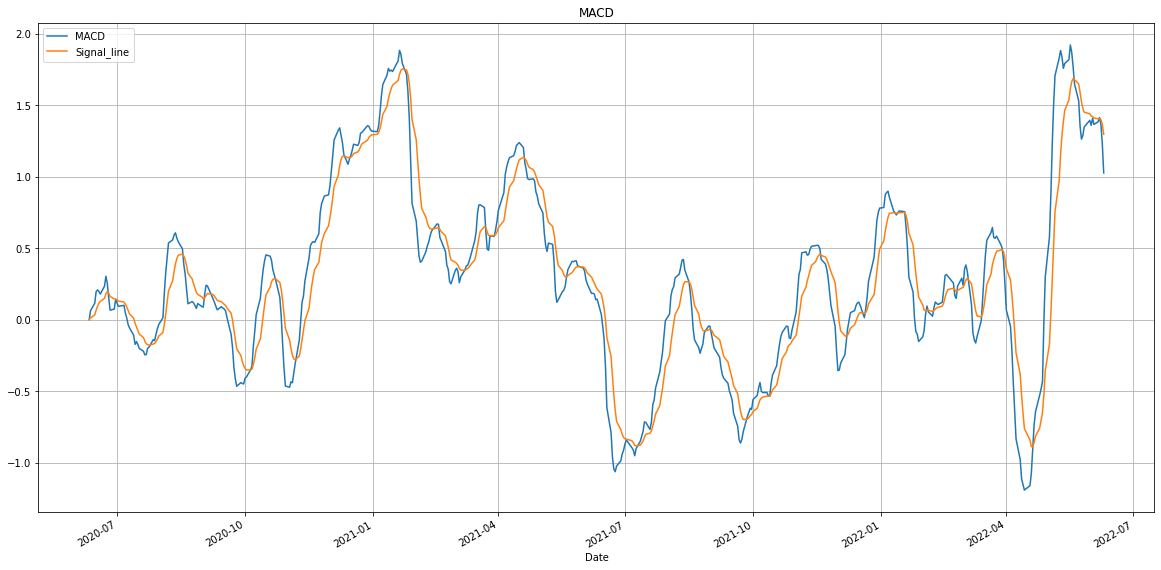

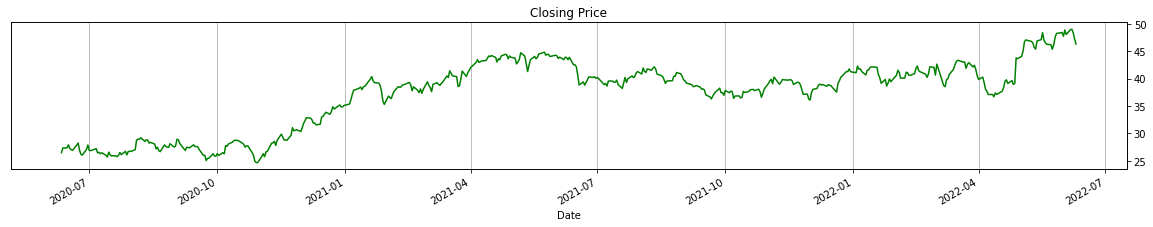

In [7]:
fig, ax = plt.subplots(figsize = (20, 10))
avt[['MACD', 'Signal_line']].plot(ax = ax, grid = True, title = 'MACD')
fig.show()

fig, ax = plt.subplots(figsize = (20, 3))
avt['Close'].plot(ax = ax,secondary_y = True, grid = True, title = 'Closing Price', c = 'g')
fig.show()

Moving Average Convergence and Divergence
From the above, the MACD line is indicated by the blue line, the orange line is the signal line while the green line represents the closing price of the stock.
When the MACD line is below the signal line, that gives a sell signal, meaning that the market is about to go on a bearish trend and when the MACD line is above the signal line,that gives us a bullish signal, meaninig that an upward trend is expected soon.

<!-- Plotting the above as one chart -->

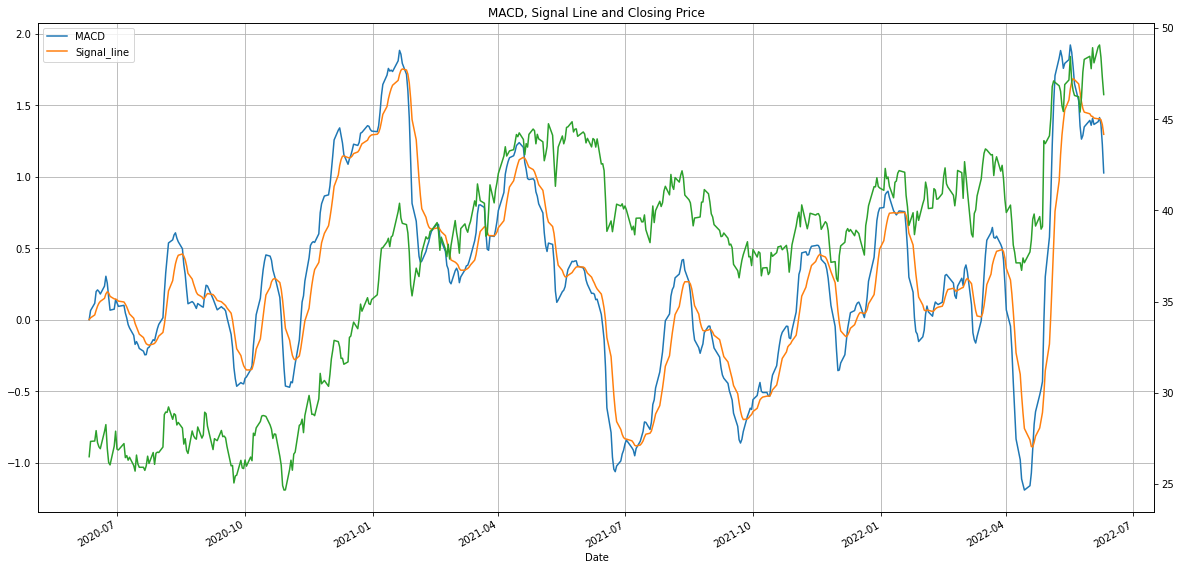

In [24]:
fig, ax = plt.subplots(figsize = (20, 10))
avt[['MACD', 'Signal_line']].plot(ax = ax)
avt['Close'].plot(ax = ax,secondary_y = True, grid = True, title = 'MACD, Signal Line and Closing Price')
fig.savefig("mahd.png")
fig.show()


In [ ]:
Moving Average Convergence Divergence (MACD) and  Stochastic Oscillator:

MACD is the formation of two moving averages diverging and converging from one another. This gives an indication of price trend and direction. This gives us a buy and sell signal. It is calculated by substracting a security's 26-day moving EMA from 12-day EMA to create an oscillating indicator value. The signal line is usually the 9-day EMA. If the MACD value is higher than 9-day EMA, that gives a bullish MA crossover. A bullish signal occurs when a faster MA crosses above a slower MA, creating market momentum and signalling more price increase, however if a faster MA crosses below  a slower MA, this gives a signal that a security is about to enter a bearish trend. 


The stochastic oscillator on the other hand compares a security's closing price to a price range over a certain period of time.

# Stochastic oscillator

In [9]:
# Stochastic oscillator
high14 = avt['High'].rolling(14).max()
low14 = avt['Low'].rolling(14).min()
avt['%K'] = (avt['Close'] - low14) * 100/(high14 - low14)
avt['%D'] = avt['%K'].rolling(3).mean()

In [10]:
# avt

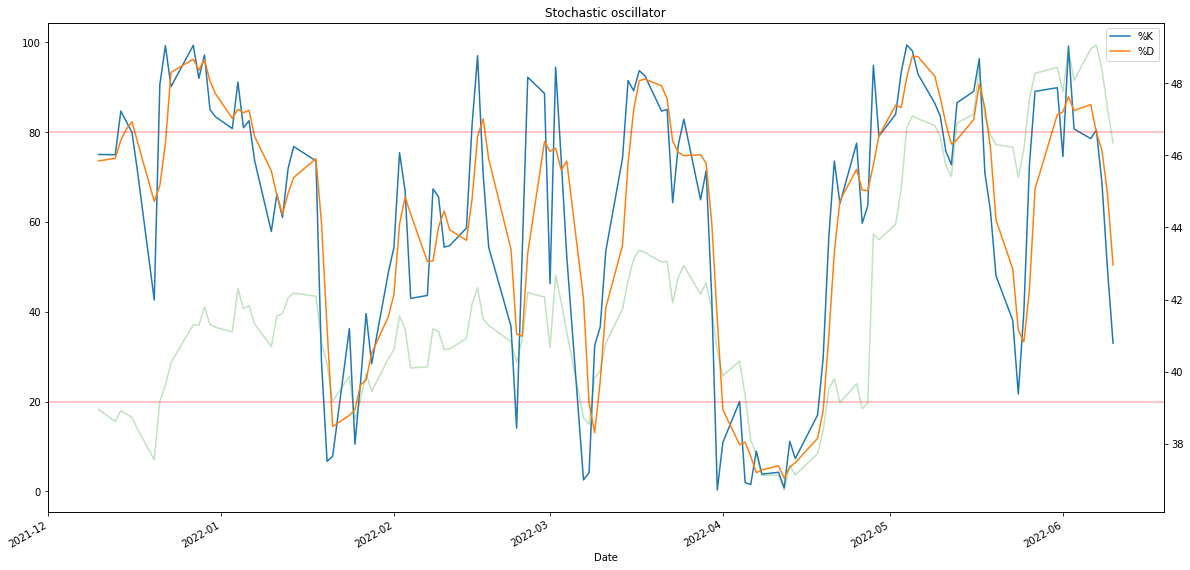

In [11]:
fig, ax = plt.subplots(figsize = (20, 10))
avt[['%K', '%D']].loc['2021-12-10':].plot(ax = ax, title = 'Stochastic oscillator')
ax.axhline(80, c= 'r', alpha = 0.3)
ax.axhline(20, c= 'r', alpha = 0.3)
avt['Close'].loc['2021-12-10':].plot(ax = ax, alpha = 0.3, secondary_y = True)

fig.show()


The Stochastic oscillator compares the stock's closing price to a price over a period of time.

In [12]:
# Plotting the MACD and stochastic oscillator in two different charts using matplotlib
def plot_macd_and_stoch(ticker, time_period, time_int):
    
    # Download stock data
    stock_df = yf.download(tickers=ticker, period=time_period, interval=time_int)
    
    # Making columns for 20 and 50 day exponential moving averages 
    stock_df['MA20'] = stock_df['Close'].ewm(span=20, adjust=False).mean()
    stock_df['MA50'] = stock_df['Close'].ewm(span=50, adjust=False).mean()
    
    exp1 = stock_df['Close'].ewm(span=12, adjust=False).mean()
    exp2 = stock_df['Close'].ewm(span=26, adjust=False).mean()
    stock_df['MACD'] = exp1 - exp2 
    
    # Stochastic oscillator
    high14 = stock_df['High'].rolling(14).max()
    low14 = stock_df['Low'].rolling(14).min()
    stock_df['%K'] = (stock_df['Close'] - low14) * 100/(high14 - low14)
    stock_df['%D'] = stock_df['%K'].rolling(3).mean()
    
    # Create a signal line
    stock_df['Signal_line'] = stock_df['MACD'].ewm(span = 9, adjust = False).mean()
    fig, ax = plt.subplots(figsize = (20, 10))
    stock_df[['MACD', 'Signal_line']].plot(ax = ax, grid = True, title = 'MACD and Signal Line')
    fig.show()

    fig, ax = plt.subplots(figsize = (20, 3))
    stock_df['Close'].plot(ax = ax,secondary_y = True, grid = True, title = 'Closing Price', c = 'g')
    
    fig, ax = plt.subplots(figsize = (20, 10))
#     stock_df[['%K', '%D']].loc['2021-12-10':].plot(ax = ax, title = 'Stochastic oscillator')
    stock_df[['%K', '%D']].plot(ax = ax, title = 'Stochastic oscillator')
    ax.axhline(80, c= 'r', alpha = 0.3)
    ax.axhline(20, c= 'r', alpha = 0.3)
    stock_df['Close'].plot(ax = ax, alpha = 0.3, secondary_y = True)

    fig.show()

[*********************100%***********************]  1 of 1 completed


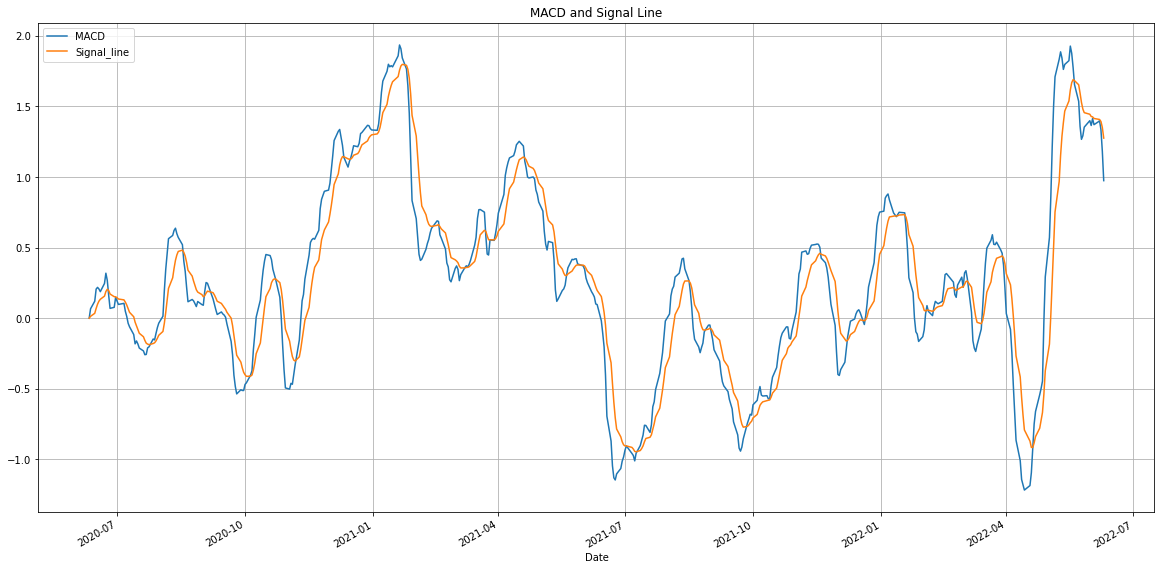

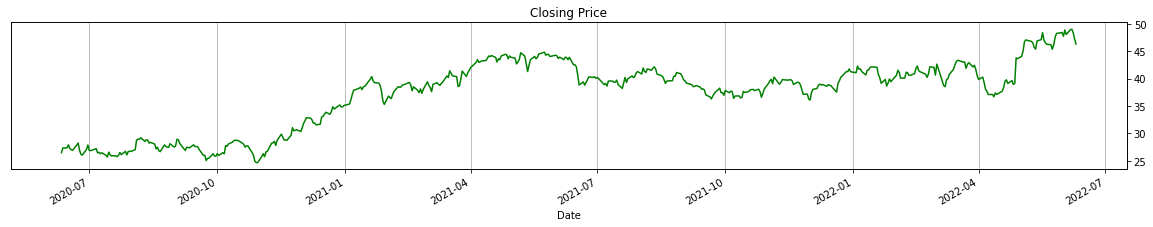

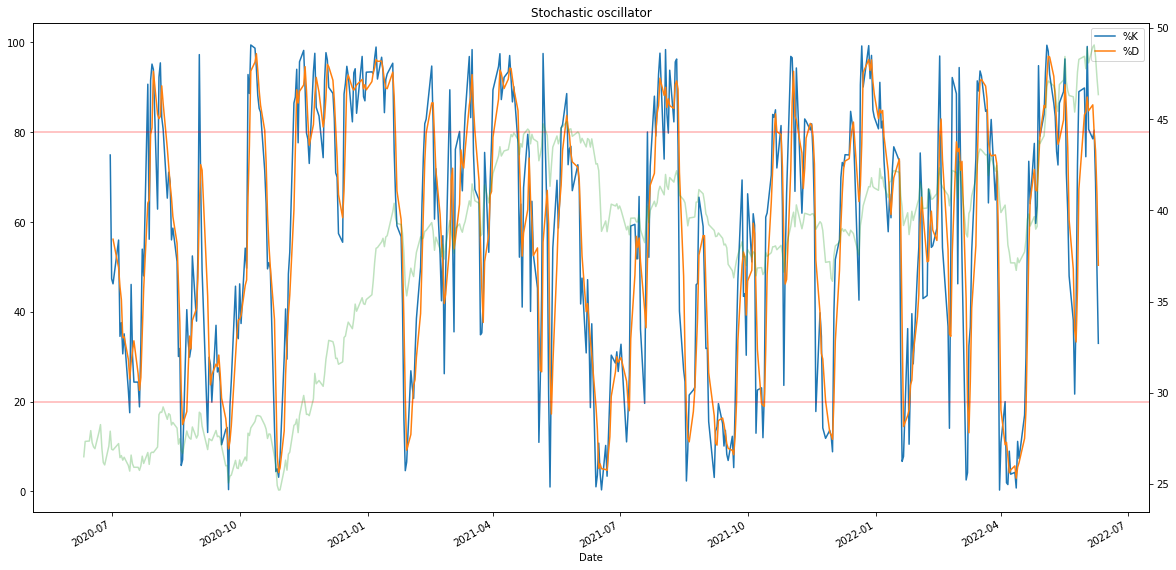

In [13]:
plot_macd_and_stoch("AVT", "2y", "1d")


Moving Average Convergence and Divergence

From the above, the MACD line is indicated by the blue line, the orange line is the signal line while the green line represents the closing price of the stock.
When the MACD line is below the signal line, that gives a sell signal, meaning that the market is about to go on a bearish trend and when the MACD line is above the signal line,that gives us a bullish signal, meaninig that an upward trend is expected soon.

In [14]:
# Plotting the MACD and Signal Line in one chart
def plot_macd_and_stoch_t(ticker, time_period, time_int):
    
    # Download stock data
    stock_df = yf.download(tickers=ticker, period=time_period, interval=time_int)
    
    # Making columns for 20 and 50 day exponential moving averages 
    stock_df['MA20'] = stock_df['Close'].ewm(span=20, adjust=False).mean()
    stock_df['MA50'] = stock_df['Close'].ewm(span=50, adjust=False).mean()
    
    exp1 = stock_df['Close'].ewm(span=12, adjust=False).mean()
    exp2 = stock_df['Close'].ewm(span=26, adjust=False).mean()
    stock_df['MACD'] = exp1 - exp2 
    
    # Create a signal line
    stock_df['Signal_line'] = stock_df['MACD'].ewm(span = 9, adjust = False).mean()
    fig, ax = plt.subplots(figsize = (20, 10))
    stock_df[['MACD', 'Signal_line']].plot(ax = ax, grid = True)
    stock_df['Close'].plot(ax = ax,secondary_y = True, grid = True, title = 'Closing Price', c = 'g')
    fig.show()

[*********************100%***********************]  1 of 1 completed


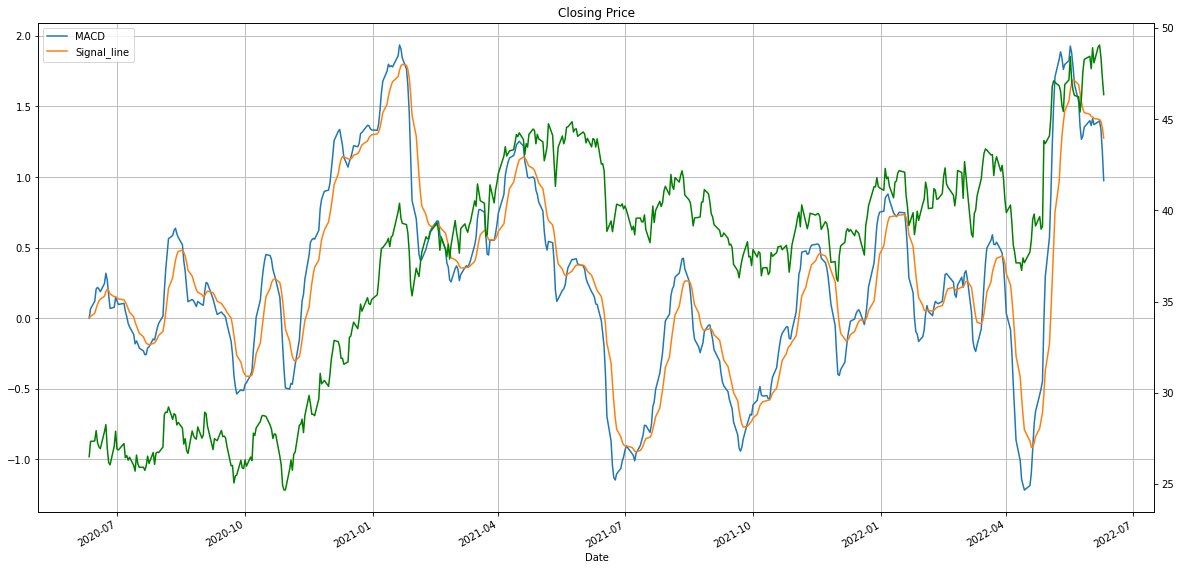

In [15]:
plot_macd_and_stoch_t("AVT", "2y", "1d")

In [20]:
def plot_macd_stoch_using_plotly(ticker, time_period, time_int):
    # Download stock data
    stock_df = yf.download(tickers=ticker, period=time_period, interval=time_int)
    
    # Define candlestick and moving average lines
    candle = go.Candlestick(x=stock_df.index, open=stock_df['Open'],
                       high=stock_df['High'], low=stock_df['Low'],
                       close=stock_df['Close'])
    # A period of 12 and 26 are commonly used
    stock_df['MA12'] = stock_df['Adj Close'].ewm(span=12, adjust=False).mean()
    stock_df['MA26'] = stock_df['Adj Close'].ewm(span=26, adjust=False).mean()
    
    # Calculate the MACD
    # A signal line uses a period of 9 and when it crosses the other moving
    # average it is a sign to buy or sell
    macd = MACD(close=stock_df['Close'],
             window_slow=26,
             window_fast=12,
             window_sign=9)

    # A Stochastic (stuh ka stuhk) Oscillator is also plotted because it 
    # gives us a signal of an upcoming trend reversal
    # Values range from 0 to 100 and values over 80 are considered to be
    # overbought while those under 20 are considered oversold
    
    # We calculate normally over a 14 day period
    # We are smoothing price data
    sto_os = StochasticOscillator(high=stock_df['High'],
                             close=stock_df['Close'],
                             low=stock_df['Low'],
                             window=14, 
                             smooth_window=3)
    
    # Make 4 subplots on separate rows
    fig = make_subplots(rows=4, cols=1, shared_xaxes=True, vertical_spacing=0.01)

    fig.add_trace(candle, row=1, col=1)

    # Add the histogram, MACD and Signal lines
    
    # The MacD line is a calculation made by subtracting the 26 period
    # EMA from the 12 period EMA
    fig.add_trace(go.Scatter(x=stock_df.index,
                         y=macd.macd(),
                         line=dict(color='blue', width=2)
                        ), row=2, col=1)
    
    # The signal is calculated by taking the average of the last 9 values
    # of the MACD line (The signal line is a slower more smoothed out version of
    # the MACD line)
    fig.add_trace(go.Scatter(x=stock_df.index,
                         y=macd.macd_signal(),
                         line=dict(color='orange', width=2)
                        ), row=2, col=1)
    
    # The histogram shows the difference between the MACD and signal line
    # When the MACD line is below the signal that is a negative value and vice versa
    fig.add_trace(go.Bar(x=stock_df.index, 
                     y=macd.macd_diff()
                    ), row=2, col=1)
    
    # The MacD line is a calculation made by subtracting the 26 period
    # EMA from the 12 period EMA
    fig.add_trace(go.Scatter(x=stock_df.index,
                         y=macd.macd(),
                         line=dict(color='blue', width=2)
                        ), row=2, col=1)
    
    # The signal is calculated by taking the average of the last 9 values
    # of the MACD line (The signal line is a slower more smoothed out version of
    # the MACD line)
    fig.add_trace(go.Scatter(x=stock_df.index,
                         y=macd.macd_signal(),
                         line=dict(color='orange', width=2)
                        ), row=2, col=1)

    # Plot Stochastics
    # This is the faster of the 2 lines called the K line
    fig.add_trace(go.Scatter(x=stock_df.index,
                         y=sto_os.stoch(),
                         line=dict(color='blue', width=2)
                        ), row=3, col=1)
    # This line is slower and is known as the D line and it is an average of the K line
    fig.add_trace(go.Scatter(x=stock_df.index,
                         y=sto_os.stoch_signal(),
                         line=dict(color='orange', width=2)
                        ), row=3, col=1)
    
    # Draw 20 and 80 lines
    fig.add_hline(y=20, line_width=1, line_dash="dash", line_color="red", row=3, col=1)
    fig.add_hline(y=80, line_width=1, line_dash="dash", line_color="green", row=3, col=1)

    # Add volume 
    fig.add_trace(go.Bar(x=stock_df.index, 
                     y=stock_df['Volume']
                    ), row=4, col=1)

    # Update titles
    fig.update_layout(title=ticker)
    fig.update_yaxes(title_text="Price", row=1, col=1)
    fig.update_yaxes(title_text="MACD", row=2, col=1)
    fig.update_yaxes(title_text="StoOs", row=3, col=1)
    fig.update_yaxes(title_text="Volume", row=4, col=1)
    

    fig.update_layout(height=900, width=800, 
                  showlegend=False, 
                  xaxis_rangeslider_visible=False,
                  xaxis_rangebreaks=[dict(bounds=["sat", "mon"]), dict(bounds=[16, 9.5], pattern="hour")])


    fig.show()

In [21]:
# If we plot AVT we can see a resistance line at around 140 on multiple dates
# The volumes spike leading into uptrends
# plot_macd_stoch("AVT", "2mo", "1h")

plot_macd_stoch_using_plotly("AVT", "2mo", "1h")

# A Stochastic Oscillator is also plotted because it 
# gives us a signal of an upcoming trend reversal
# Values range from 0 to 100 and values over 80 are considered to be
# overbought while those under 20 are considered oversold
# This isn't a simple buy or sell plot however and it is common for stocks
# to stay overbought or sold over long periods
# This isn't a chart you use on its own, but instead to backup other charts
# You use it normally when an investment is either in a down or up trend.
# This means the stock is bouncing up and down, but consistently reaching higher highs
# or lower lows. When in one of these trends it is common for it to remain in
# overbought or sold trends for a long time.

# Don't buy based on this chart during downtrends and don't sell during uptrends!

[*********************100%***********************]  1 of 1 completed
